In [25]:
import random
import time
import enum
import math
from collections import namedtuple
from multiprocessing.pool import Pool
from typing import Tuple, NamedTuple, List

import numpy as np
import pandas as pd
import pylab as plt
import networkx as nx
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from networkgen import Network, NetworkType
from model import OpinionModel, Opinion

SyntaxError: invalid syntax (3469176724.py, line 17)

In [11]:
def create_model(network_type, *params, initial_believers: float, p_opinion_change: float):
    n = len(Network.generate(network_type, *params).nodes)
    return OpinionModel(n, initial_believers, p_opinion_change, network_type, *params)

In [12]:
def sum_agents(model):

    agent_data = model.data_collector.get_agent_vars_dataframe()
    # sum up different opinions each (time) step
    agents_summed = pd.pivot_table(agent_data.reset_index(), index = 'Step', columns = 'State', aggfunc = np.size, fill_value = 0)
    # relabel
    labels = ['Disagree','Believer','Unsure']
    agents_summed.columns = labels[:len(agents_summed.columns)]
    return agents_summed

def plot_agent_opinion(model):
    steps = model.schedule.steps
    X = sum_agents(model)
    X.plot(lw = 4, alpha = 0.8)

In [13]:
Network.visualize(NetworkType.SMALLWORLD, model.network)

NameError: name 'model' is not defined

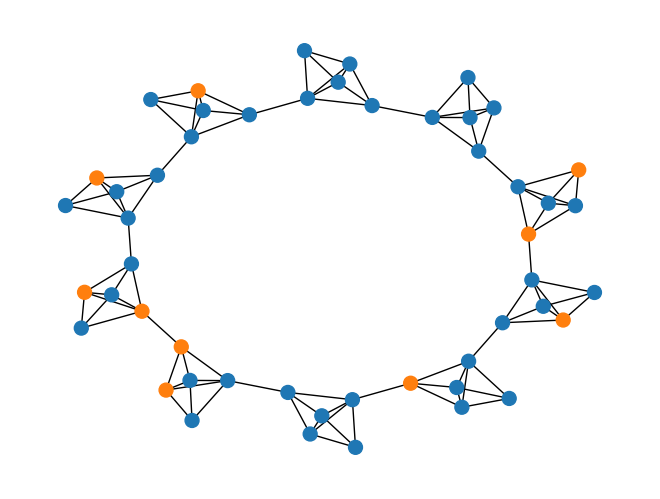

In [ ]:
color_code = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])

states = [int(i.state) for i in model.grid.get_all_cell_contents()]

colors = [color_code(i) for i in states]

nx.draw_kamada_kawai(model.network, node_size = 100, edge_color = 'black', node_color = colors)

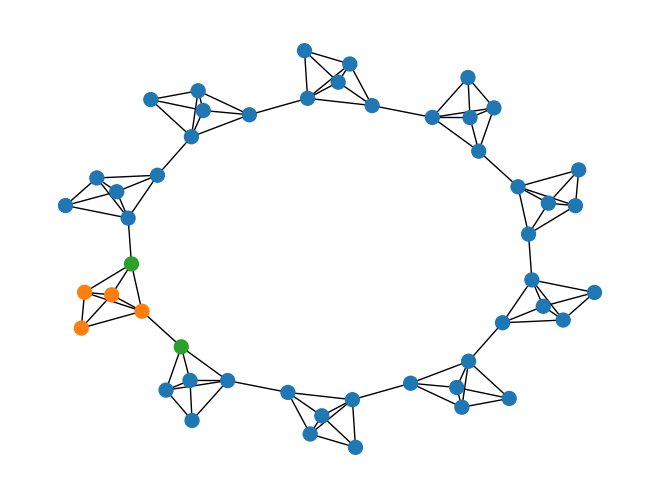

In [ ]:
color_code = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])

states = [int(i.state) for i in model.grid.get_all_cell_contents()]

colors = [color_code(i) for i in states]

nx.draw_kamada_kawai(model.network, node_size = 100, edge_color = 'black', node_color = colors)

In [ ]:
def plot_network_visualization(model: OpinionModel):
    color_code = ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c'])
    states = [int(i.state) for i in model.grid.get_all_cell_contents()]
    colors = [color_code(i) for i in states]
    nx.draw_kamada_kawai(model.network, node_size = 100, edge_color = 'black', node_color = colors)

In [16]:
#pass the model, run it, and plot it
def driver(network_type, *params, initial_believers, p_opinion_change):
    model = create_model(network_type, params, initial_believers = initial_believers, p_opinion_change = p_opinion_change)
    model.run(40)
    plot_agent_opinion(model)
    return model

In [17]:
def plot_network(model):
    plot_network_visualization(model)

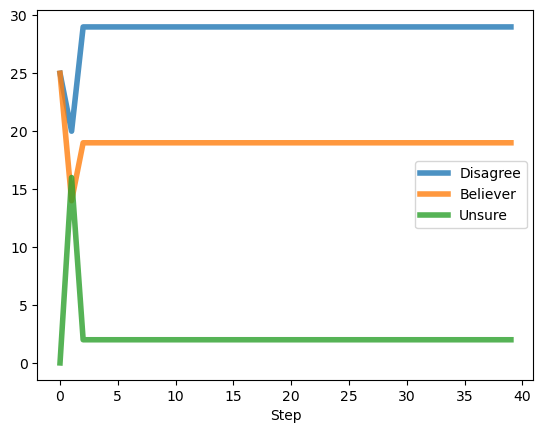

In [23]:
model = driver(NetworkType.CAVEMAN, 5, 10, initial_believers = 0.5, p_opinion_change = 0.15)

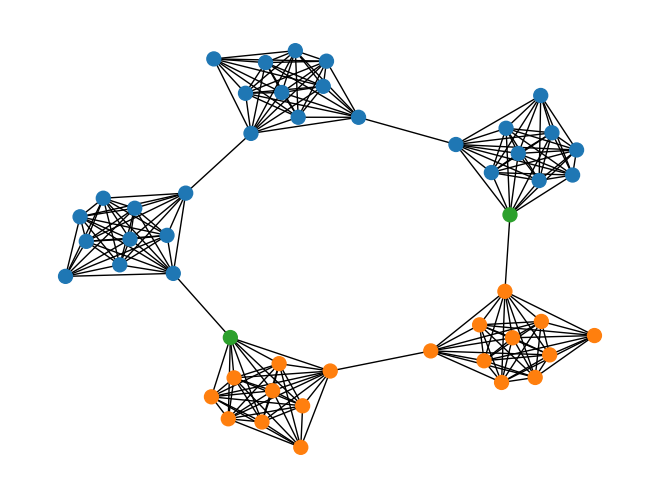

In [24]:
plot_network(model)